<a href="https://colab.research.google.com/github/VilchisKarla/SIMULACION-I/blob/main/Aplicacion_Flecha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*VILCHIS GARCÍA KARLA IVONNE*

Ejercicio 5.4

# Metodología de la Simulación

## Ejercicio
Una flecha será ensamblada en un cojinete como se muestra a continuación:

(Imagen de un eje y un cojinete con dimensiones
𝑋1 y  𝑋2)

Si  𝑋1 sigue una distribución normal con media 1.5 y varianza 0.0016, y 𝑋2
  sigue esta misma distribución con media 1.48 y varianza 0.0009, determine:

    a) La probabilidad de que haya interferencia.

    b) El número de veces que es necesario simular el experimento, si se quiere que la probabilidad de interferencia estimada difiera de su valor verdadero en menos de 0.01, con un nivel de seguridad del 95%.

# **a)**

**PASO 1**. Defina las variables que intervienen en el modelo.

$$\chi_1 \sim N(1.5,0.04)$$
$$\chi_2 \sim N(1.48,0.03)$$

**PASO 2**. Formule la distribución de probabilidad de cada variable.

$$\chi_1 \sim f(x)=\frac{1}{\sqrt{2\pi}(0.04)}e^{\frac{-(x-1.5)^2}{2(0.0016)}}$$

$$\chi_2 \sim f(x)=\frac{1}{\sqrt{2\pi}(0.03)}e^{\frac{-(x-1.48)^2}{2(0.0009)}}$$

**PASO 3**. Enumere la distribución acumulada de probabilidad de cada variable.

Tenemos 3 posibles métodos: **12 uniformes, aproximacón para una distribución normal y Box-Muller**


*   **NO** usaremos las 12 uniformes porque se necesitan de 12 números aleatorios y eso haría ineficiente nuestro código.
*   **NO** usaremos la aproximación por una distribución normal porque no es precisa para pequeñas muestras.
*   **Usaremos** Box-Muller por la velocidad y precisión favorable que nos brinda al generar 2 desviaciones normales a partir de 2 números aleatorios.

**Pseudocódigo**

1. Generar $U_1, U_2  \sim U(0,1)$

2. Hacer: $\quad R=\sqrt{-2lnU_1}\qquad , \qquad \theta=2\pi  U_2$

3. Hacer: $\quad X=Rcos(\theta) \qquad ,\quad Y=Rsen(\theta)$

4. Salida: $X,Y$





In [ ]:
#en este caso ocuparemos una paquetería que ya devuelve numeros aleatorios bajo una distribución normal.
import numpy as np
import random

x1=np.random.normal(1.5,0.04,1)
x2=np.random.normal(1.48,0.03,1)

**PASO 4**. Establezca el intervalo de números aleatorios correspondiente a cada valor de cada una de las variables.

condición de interferencia:
$$\chi_2 \geq \chi_1$$

Buscamos $P(\chi_2 \geq \chi_1)$

**PASO 5**. Genere números aleatorios.

In [ ]:
import numpy as np
import random
'''
definimos nuestro experimento que será calcular n numeros aleatorios y los que
cumplan la condición de interferencia se van sumando para obtener la probabilidad
de que haya interferencia.
'''
def experimento(n):
    sum=0 #definimos el contador para los números que cumplan tener interferencia
    for _  in range(n):#ciclo para los n números
        x1=np.random.normal(1.5,0.04,1)
        x2=np.random.normal(1.48,0.03,1)
        if x2>=x1:#condición de interferencia
            sum+=1
    prob=sum/n
    return prob

**PASO 6**. Repetir M veces el experimento

In [ ]:
'''
Repetimos el experimento m veces para obtener una lista de probabilidades y
poder hacer estadística
'''
def muestra(m):
    lista=[]
    for i in range(m):
        d =experimento(i+1)
        lista.append(d)
    return lista

n = 10
B=muestra(1000)
print('MEDIA Muestra:',np.mean(B))
print('VARIANZA Muestra:', np.var(B))
print('DESVIACIÓN ESTÁNDAR Muestra:', np.std(B))

MEDIA Muestra: 0.3451212633193687
VARIANZA Muestra 0.0019872390683342853
DESVIACIÓN ESTÁNDAR Muestra 0.04457845969001492


**PASO 7**. Obtenga la gráfica de estabilización que indica que el tamaño de muestra utilizado es suficiente para
garantizar la convergencia del resultado.

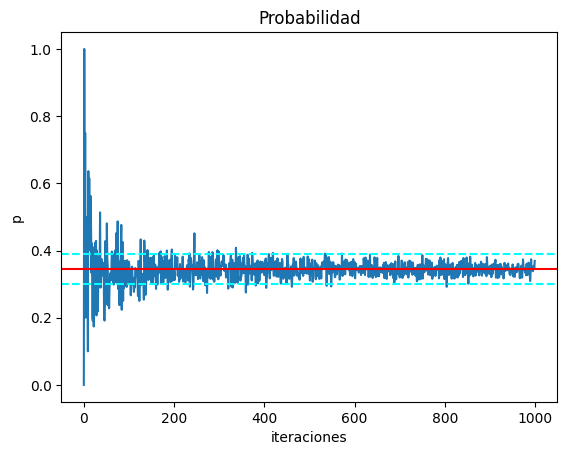

In [ ]:
import matplotlib.pyplot as plt
#Graficamos la media y varianza de la muestra
plt.plot(B)
plt.xlabel('iteraciones')
plt.ylabel('p')
plt.title('Probabilidad')
plt.axhline(y=np.mean(B), color='r', label="media:")
plt.axhline(y=np.mean(B)+np.std(B),color='cyan', linestyle='--', label="Varianza")
plt.axhline(y=np.mean(B)-np.std(B), color='cyan', linestyle='--')
plt.show()

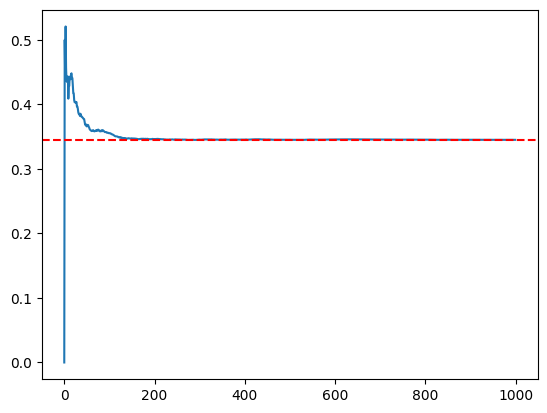

In [ ]:
import matplotlib.pyplot as plt
#tomamos la media acumulada para visualizar de mejor manera la cantidad de
#muestras que necesitamos para tener datos más acertados
media_acumulada = np.cumsum(B) / np.arange(1, 1000 + 1)
plt.plot(media_acumulada, label='Media acumulada')
plt.axhline(y=np.mean(B), color='r', linestyle='--', label='Media final')
plt.show()

**PASO 8**. Replique el modelo.

In [ ]:
#Replicamos el modelo las repeticiones que deseemos y obtendremos una distribución normal
def simulacion(repeticiones):
    List = []
    for i in range(repeticiones):
        List.append(np.mean(experimento(1000)))
    return List

In [ ]:
sim = simulacion(500)

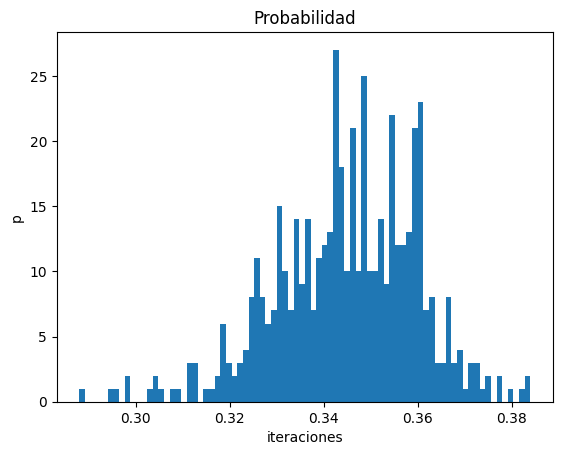

In [ ]:
#graficamos el histograma
plt.hist(sim, bins=80)
plt.xlabel('iteraciones')
plt.ylabel('p')
plt.title('Probabilidad')
plt.show()

**PASO 9**. Calcule la probabilidad de interferencia y su desviación
estándar.

In [ ]:
print('MEDIA:',np.mean(sim))
print('VARIANZA', np.var(sim))
print('DESVIACIÓN ESTÁNDAR', np.std(sim))

MEDIA: 0.34467
VARIANZA 0.00023146909999999972
DESVIACIÓN ESTÁNDAR 0.015214108583811269


:**PASO 10**. Halle el intervalo de confianza de la probabilidad de que haya interfere con un nivel de confianza del $95 \%$.

Ocupamos

$$\bar{x} \pm z\cdot \frac{\sigma}{\sqrt{n}}$$

Para ello ocupamos la solución analítica

## Solución analitica

$$\chi_1 \sim N(1.5,0.04)$$
$$\chi_2 \sim N(1.48,0.03)$$

interferencia $\qquad \qquad \qquad \chi_2 \geq \chi_1$

Queremos calcular $P(\chi_2 \geq \chi_1)$

Definimos una nueva variable dado que $\chi_1$ y $\chi_2$ siguen una distribución normal

y como tenemos que: $\chi_2 \geq \chi_1$

Entonces
$$Y \sim N(\mu_y,\sigma_y)$$

$$Y=\chi_2 - \chi_1 \geq 0$$

Por lo tanto
$$\mu_y=\mu_2-\mu_1=1.48-1.5=-0.02$$
$$\sigma_y=\sqrt{\sigma_1^2+\sigma_2^2}=\sqrt{0.0016+0.0009}=0.05$$

$$\therefore Y\sim N(0.05,-0.02)$$

Finalmente obtenemos


```
v=scipy.stats.norm.cdf(0.05,-0.02)
```


$1-v=P(Y \geq 0) = P(\chi_2 - \chi_1 \geq 0)=\int_0^{\chi_2 - \chi_1}\frac{1}{\sqrt{2\pi}(0.05)}e^{\frac{-(x+0.2)^2}{2(0.0025)}}$



In [ ]:
import scipy.stats

prob = 1 - scipy.stats.norm.cdf(0, -0.02,0.05)
print(prob)


0.3445782583896758


# **b)**

El número de veces que es necesario simular el experimento, si se quiere que la probabilidad de interferencia estimada difiera de su valor verdadero en menos de 0.01, con un nivel de seguridad del 95% ($\alpha/2=1.96$).


Para ello observamos la grafica del paso 7 donde podemos determinar el tamaño de muestra suficiente para garantizar la convergencia del resultado. En este caso, podemos ver que basta con 400 intentos para una buena convergencia, es decir, será suficiente repetir nuestro expermineto 400 veces para que difiera con un error minimo a su valor verdadero.

:**PASO 10**. Halle el intervalo de confianza de la probabilidad de que haya interfere con un nivel de confianza del $95 \%$.

Ocupamos

$$\bar{x} \pm z\cdot \frac{\sigma}{\sqrt{n}} $$
intervalo de aceptación
$$\bar{x}\pm \frac{2\sigma z_{\alpha/2}}{\sqrt{n}}$$
Para ello ocupamos la solución analítica

In [ ]:
h = 400
z = 1.96  # para 95% de confianza
desviacion = 0.05
media = prob

# Error estándar
error_estandar = desviacion / np.sqrt(h)

# Intervalo de confianza
limite_inferior = media - (z *2*desviacion)/np.sqrt(h)
limite_superior = media + (z *2*desviacion)/np.sqrt(h)

print(f"Intervalo de confianza del 95%: ({limite_inferior:.4f}, {limite_superior:.4f})")


Intervalo de confianza del 95%: (0.3348, 0.3544)


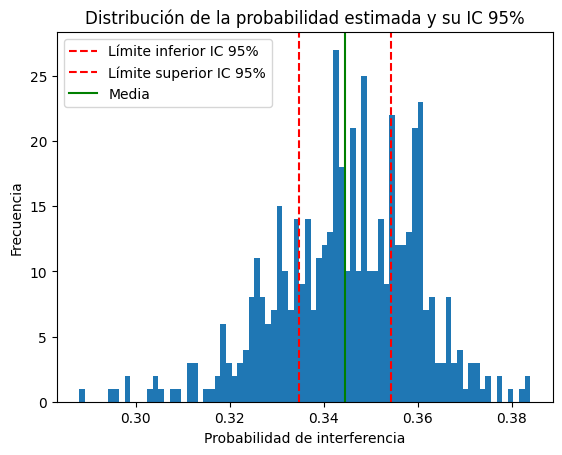

In [ ]:
# Histograma con líneas del intervalo de confianza
plt.hist(sim, bins=80)
plt.axvline(limite_inferior, color='red', linestyle='--', label='Límite inferior IC 95%')
plt.axvline(limite_superior, color='red', linestyle='--', label='Límite superior IC 95%')
plt.axvline(media, color='green', linestyle='-', label='Media')
plt.xlabel('Probabilidad de interferencia')
plt.ylabel('Frecuencia')
plt.title('Distribución de la probabilidad estimada y su IC 95%')
plt.legend()
plt.show()